In [1]:
#Transform data, remove extra data, visualisation, checking data corlation
#Predict likelyhood of death from covid

In [2]:
# The dataset was provided by the Mexican government (link). This dataset contains an enormous number of 
# anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique 
# features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values 
# as 97 and 99 are missing data.

# sex: 1 for female and 2 for male.
# age: of the patient.
# classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
# degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
# patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
# pneumonia: whether the patient already have air sacs inflammation or not.
# pregnancy: whether the patient is pregnant or not.
# diabetes: whether the patient has diabetes or not.

# copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
# asthma: whether the patient has asthma or not.
# inmsupr: whether the patient is immunosuppressed or not.
# hypertension: whether the patient has hypertension or not.
# cardiovascular: whether the patient has heart or blood vessels related disease.
# renal chronic: whether the patient has chronic renal disease or not.
# other disease: whether the patient has other disease or not.
# obesity: whether the patient is obese or not.
# tobacco: whether the patient is a tobacco user.
# usmr: Indicates whether the patient treated medical units of the first, second or third level.
# medical unit: type of institution of the National Health System that provided the care.
# intubed: whether the patient was connected to the ventilator.
# icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
# date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
covid_dataset = pd.read_csv("Covid_Data.csv")
covid_dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
covid_dataset.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
715987,2,12,2,1,9999-99-99,97,2,51,97,2,...,2,2,1,2,2,2,2,2,6,97
863674,1,12,2,1,9999-99-99,97,2,41,97,2,...,2,2,2,2,2,2,2,2,7,97
906364,2,12,1,1,9999-99-99,97,2,29,2,2,...,2,2,1,2,2,1,2,2,7,97
162743,1,4,1,1,9999-99-99,97,2,40,2,2,...,2,2,2,2,2,2,2,2,5,97
267828,2,4,2,1,9999-99-99,97,2,29,97,2,...,2,2,2,2,2,2,2,2,7,97
1034122,2,12,2,1,9999-99-99,97,2,62,97,2,...,2,2,2,2,2,2,2,2,7,97
468134,1,12,2,2,24/07/2020,2,1,61,97,2,...,2,2,2,2,2,2,2,2,3,2
215372,1,4,2,1,9999-99-99,97,2,38,97,2,...,2,2,2,2,2,2,2,2,6,97
271141,2,4,1,1,9999-99-99,97,2,25,2,2,...,2,2,2,2,1,2,2,2,7,97
74653,2,4,1,1,9999-99-99,97,2,48,2,2,...,2,2,2,2,2,2,2,2,3,97


In [6]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df = covid_dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
covid_dataset.isnull().sum().sum()

0

In [11]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [12]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [13]:
df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

In [14]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [15]:
# If we have "9999-99-99" values that means this patient is alive.

df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

AttributeError: 'numpy.int64' object has no attribute 'startswith'

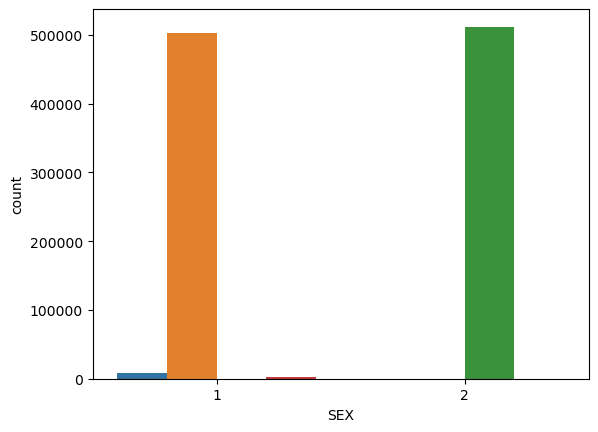

In [17]:
plt.figure()
ax = sns.countplot(x = "SEX", hue = "PREGNANT", data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red")

In [18]:
df.drop(columns = ["INTUBED", "ICU", "DATE_DIED"], inplace = True)

In [19]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


In [20]:
irrelevant_columns = ["SEX", "PREGNANT", "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "TOBACCO"]
df.drop(columns = irrelevant_columns, inplace = True)

In [21]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [22]:
# Preparing catagorical features that are not binary.

df = pd.get_dummies(df, columns = ["MEDICAL_UNIT", "CLASIFFICATION_FINAL"], drop_first = True)

In [23]:
# Scaling numeric feature

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1, 1))

In [24]:
x = df.drop(columns = "DEATH")
y = df["DEATH"]

In [25]:
# Train test split

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (820121, 25)
Test_x : (205031, 25)
Train_y : (820121,)
Test_y : (205031,)


In [26]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy: ", log_reg.score(test_x, test_y))

Logistic Regression Accuracy:  0.9400773541562008


c:\Users\kaige\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import f1_score
print("Logistic Regression F1 score: ", f1_score(test_y, log_reg.predict(test_x), average = None))

Logistic Regression F1 score:  [0.52372461 0.96802736]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

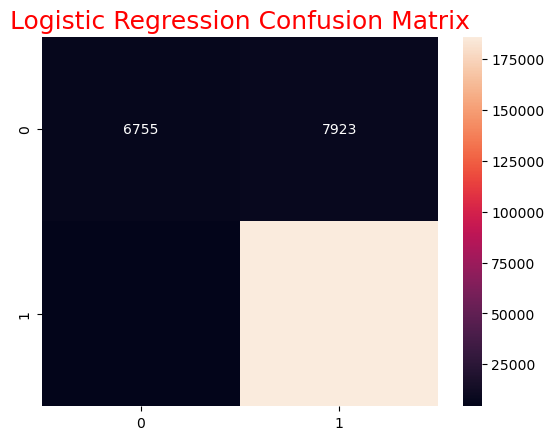

In [30]:
# Confusion metrics

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red")

In [10]:
#def date_died_encoder(column):
    for i in range(len(column)):
        if column[i] == "9999-99-99":
            column[i] = 0
        else:
            column[i] = 1

#covid_dataset.apply(date_died_encoder(covid_dataset["DATE_DIED"]), inplace = False)
#covid_dataset.head()

IndentationError: unexpected indent (2736863905.py, line 2)